In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm

Wczytaj dane opisujące ilość plam słonecznych w okresie od 1700 do 2008 r.

In [2]:
# trzeba podzielić elementy zbioru do train i do test, ale nie można już losowo, trzeba podzilić sensownie
series = Series.from_csv('./sunspots.csv', header=0)
series.head()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

In [3]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

# Zadanie
Narysuj szereg czasowy

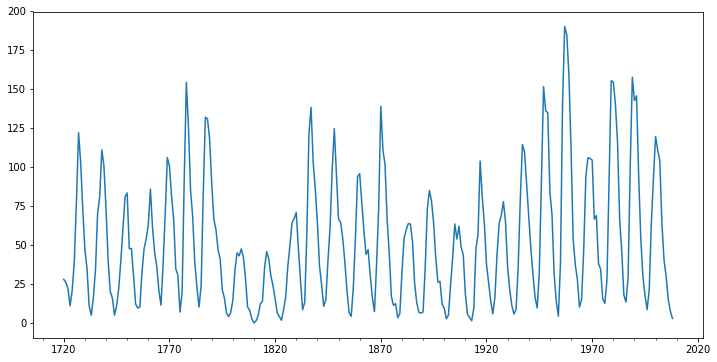

In [4]:
plt.figure(figsize=(12,6));
series.loc['1720':].plot()
plt.show()

# Dzielę próbkę na train test

In [5]:
series1=series.loc['1720':'1960']
series2=series.loc['1961':'2008']

# AR(2) = ARMA(2,0)

In [6]:
arma_mod20 = sm.tsa.ARMA(series1, (2,0)).fit()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/kodolamacz/anac

## Wykonajmy predykcję 

In [7]:
predict_sunspots20 = arma_mod20.predict('1961', '2008', dynamic=True)

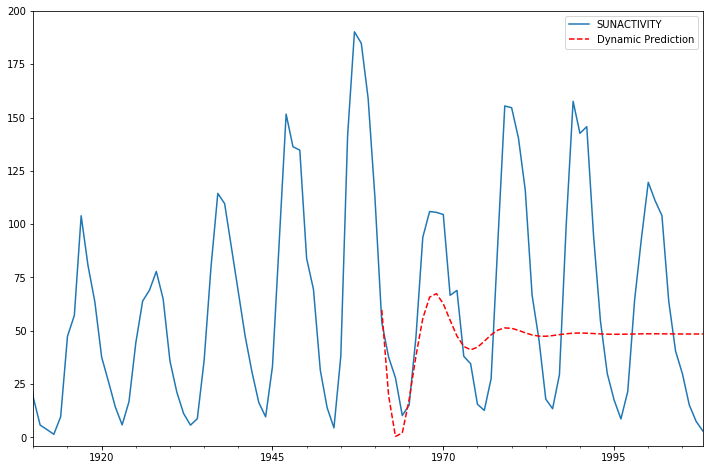

In [8]:
plt.figure(figsize=(12,6));
ax = series.loc['1720':].plot(figsize=(12,8))
predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.axis((-60.0, 38.0, -4.0, 200.0));
ax.legend();
plt.show()

# Zad 
Znajdź optymalny model mając zbiór treningowy i testowy 

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


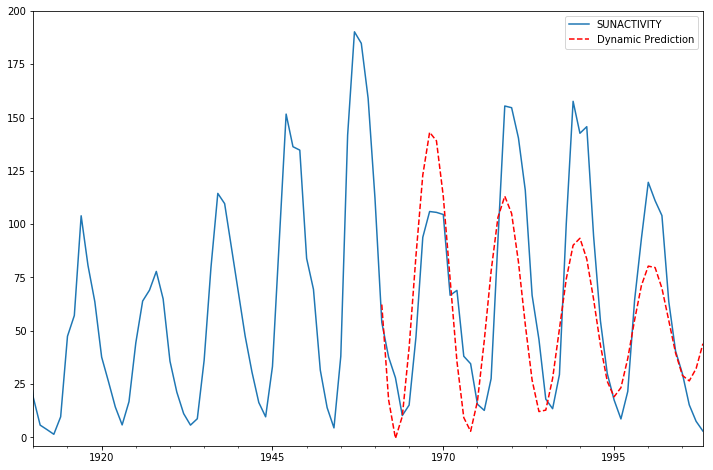

In [11]:
arma_mod34 = sm.tsa.ARMA(series1, (3,7)).fit()

predict_sunspots34 = arma_mod34.predict('1961', '2008', dynamic=True)

plt.figure(figsize=(12,6));
ax = series.loc['1720':].plot(figsize=(12,8))
predict_sunspots34.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.axis((-60.0, 38.0, -4.0, 200.0));
ax.legend();
plt.show()

In [14]:
predict_sunspots34 = arma_mod34.predict('2009', '2050', dynamic=True)

plt.figure(figsize=(12,6));
ax = series.loc['1720':].plot(figsize=(12,8))  
predict_sunspots34.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.axis((-60.0, 38.0, -4.0, 200.0));
ax.legend();
plt.show()

ValueError: could not broadcast input array from shape (0) into shape (7)